In [ ]:
"""https://jawadmovie.streamlit.app"""

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movies-dataset/merged_dataset.csv


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/imdb-movies-dataset/merged_dataset.csv")

# Display basic info
df.info()

# Check null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1500 non-null   object 
 1   year          1500 non-null   int64  
 2   movie_rated   1500 non-null   object 
 3   run_length    1500 non-null   object 
 4   genres        1500 non-null   object 
 5   release_date  1500 non-null   object 
 6   rating        1500 non-null   float64
 7   num_raters    1500 non-null   int64  
 8   num_reviews   1500 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 105.6+ KB


name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
dtype: int64

In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/kaggle/input/imdb-movies-dataset/merged_dataset.csv")

# Convert runtime to minutes
def convert_runtime(runtime):
    if pd.isna(runtime):
        return np.nan
    runtime = runtime.lower()
    hours = 0
    minutes = 0
    if 'h' in runtime:
        parts = runtime.split('h')
        hours = int(parts[0])
        if 'min' in parts[1]:
            minutes = int(parts[1].replace('min','').strip())
    elif 'min' in runtime:
        minutes = int(runtime.replace('min','').strip())
    return hours * 60 + minutes

df['runtime_min'] = df['run_length'].apply(convert_runtime)

# Select two meaningful features (NO scaling)
X = df[['rating', 'runtime_min']].dropna()


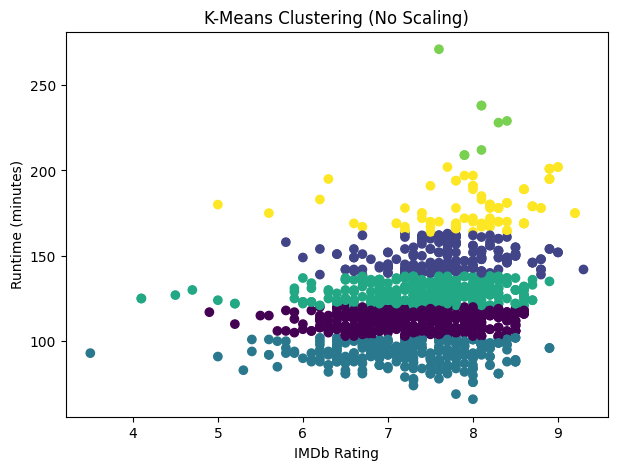

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X['rating'], X['runtime_min'], c=kmeans_labels, cmap='viridis')
plt.xlabel("IMDb Rating")
plt.ylabel("Runtime (minutes)")
plt.title("K-Means Clustering (No Scaling)")
plt.show()


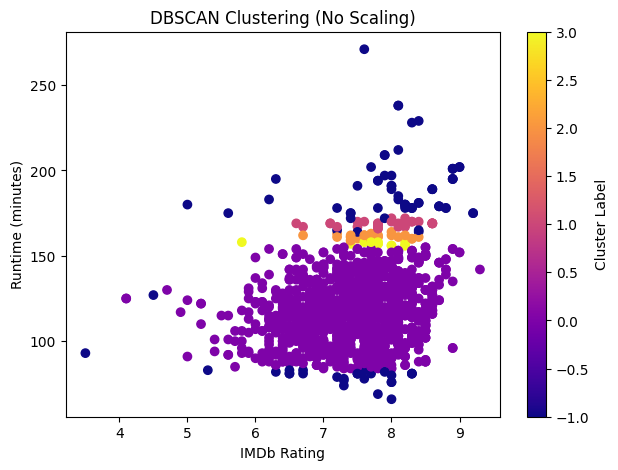

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Convert DataFrame to NumPy array (recommended)
X_np = X[['rating', 'runtime_min']].to_numpy()

# Apply DBSCAN (scikit-learn 1.6.1 compatible)
dbscan = DBSCAN(
    eps=2,
    min_samples=20,
    metric='euclidean'
)

dbscan_labels = dbscan.fit_predict(X_np)

# Visualization
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    X_np[:, 0],
    X_np[:, 1],
    c=dbscan_labels,
    cmap='plasma'
)

plt.xlabel("IMDb Rating")
plt.ylabel("Runtime (minutes)")
plt.title("DBSCAN Clustering (No Scaling)")
plt.colorbar(scatter, label="Cluster Label")
plt.show()


In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-Means evaluation
kmeans_silhouette = silhouette_score(X, kmeans_labels)
kmeans_db = davies_bouldin_score(X, kmeans_labels)

# DBSCAN evaluation (ignore noise)
mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
dbscan_db = davies_bouldin_score(X[mask], dbscan_labels[mask])

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Davies-Bouldin Index:", kmeans_db)

print("\nDBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Davies-Bouldin Index:", dbscan_db)


K-Means Silhouette Score: 0.5192139273936999
K-Means Davies-Bouldin Index: 0.525389910990277

DBSCAN Silhouette Score: 0.40937419934010827
DBSCAN Davies-Bouldin Index: 0.38610576217932735


In [8]:
import sys
import sklearn

print("Python version:", sys.version)
print("Scikit-learn version:", sklearn.__version__)


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Scikit-learn version: 1.6.1
